# An Illustrative Example of Logistic Regression Regularization

Let's see how regularization affects the quality of classification on a dataset on microchip testing. We will use logistic regression with polinomial features and vary the regularization parameter C. First, we will how regularization affects the separating border of the classifier and intuitvely recognize under- and overfitting. Then, we will choose the regularization parameter to be numerically close to the optimal value via ```cross-validation``` and ```GridSearch```.

In [1]:
# To ignore warnings:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV

### 1. Dataset

In [2]:
# loading in the data
data = pd.read_csv('../data/microchip_test.txt', header=None,
                   names=('test1', 'test2', 'released'))
# dataframe info:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 3 columns):
test1       118 non-null float64
test2       118 non-null float64
released    118 non-null int64
dtypes: float64(2), int64(1)
memory usage: 2.8 KB


Lets inspect the first and last 5 lines:

In [3]:
data.head(5)

,test1,test2,released
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [4]:
data.tail(5)

,test1,test2,released
113,-0.720620,0.538740,0
114,-0.593890,0.494880,0
115,-0.484450,0.999270,0
116,-0.006336,0.999270,0
117,0.632650,-0.030612,0


Now we should save the training set and the target class labels in seperate NumPy arrays.

In [5]:
X = data[['test1', 'test2']].values
y = data['released'].values

As an intermediate step, we can plot the data. Orange points correspond to defective chips, and blue to normal ones.

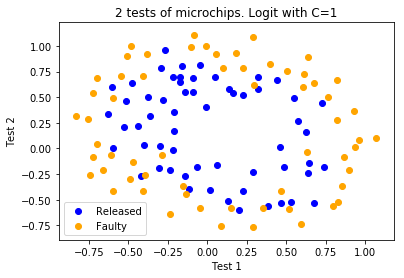

In [10]:
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='blue', label='Released');
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='orange', label='Faulty');
plt.xlabel("Test 1")
plt.ylabel("Test 2")
plt.title("2 tests of microchips. Logit with C=1")
plt.legend();

Let's define a function to display the separating curve of the classifier:

In [ ]:
def plot_boundary(clf, X, y, grid_step=0.1, poly_featurizer=None):
    x_min, x_max = X[:, 0].min() - .1, x[:, 0].max() + 1
    y_min, y_max = X[:, 0].min() - .1, x[:, 0].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, grid_step),
                         np.arange(y_min, y_max, grid_step))
    # to every point from [x_min, ]